In [2]:
import tensorflow as tf
data=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# Import Data

In [3]:
(X_train, y_train), (X_test, y_test) = data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


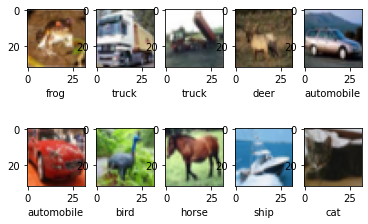

In [4]:
import matplotlib.pyplot as plt
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(10):
    # define subplot
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(labelNames[int(y_train[i])])
plt.show()

Data is of various items, ranging from animals to vehicles. They are also in colour

In [5]:
import pandas as pd
i=0
for i in range(10):
    print(i,'y_train: ', list(y_train).count(i))
print('#'*10)
i=0
for i in range(10):
    print(i,'y_test: ', list(y_test).count(i))

0 y_train:  5000
1 y_train:  5000
2 y_train:  5000
3 y_train:  5000
4 y_train:  5000
5 y_train:  5000
6 y_train:  5000
7 y_train:  5000
8 y_train:  5000
9 y_train:  5000
##########
0 y_test:  1000
1 y_test:  1000
2 y_test:  1000
3 y_test:  1000
4 y_test:  1000
5 y_test:  1000
6 y_test:  1000
7 y_test:  1000
8 y_test:  1000
9 y_test:  1000


Model is balanced with the same count for each class

In [6]:
import numpy as np 
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
from tensorflow.compat.v1.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
seed = 100
np.random.seed(seed)

# Model 1, incrementally increasing Conv2D

Model 1 uses conv2D layers with increasing values to help generalise the data. A SGD with custom parameters was chosen to help with the model. 

In [8]:
#model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))
optim=SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

2021-11-24 23:58:58.741091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 23:58:58.850350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 23:58:58.852784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 23:58:58.856709: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
%%time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_data=(X_test, y_test), verbose=2, callbacks=callback)

2021-11-24 23:59:02.963034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-24 23:59:04.106694: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


625/625 - 9s - loss: 1.8822 - accuracy: 0.3369 - val_loss: 1.6920 - val_accuracy: 0.4094
Epoch 2/100
625/625 - 2s - loss: 1.6129 - accuracy: 0.4360 - val_loss: 1.5367 - val_accuracy: 0.4612
Epoch 3/100
625/625 - 2s - loss: 1.4989 - accuracy: 0.4759 - val_loss: 1.4651 - val_accuracy: 0.4820
Epoch 4/100
625/625 - 2s - loss: 1.4217 - accuracy: 0.5037 - val_loss: 1.4036 - val_accuracy: 0.5072
Epoch 5/100
625/625 - 2s - loss: 1.3474 - accuracy: 0.5310 - val_loss: 1.3465 - val_accuracy: 0.5269
Epoch 6/100
625/625 - 2s - loss: 1.2712 - accuracy: 0.5570 - val_loss: 1.2867 - val_accuracy: 0.5505
Epoch 7/100
625/625 - 2s - loss: 1.1941 - accuracy: 0.5842 - val_loss: 1.2045 - val_accuracy: 0.5810
Epoch 8/100
625/625 - 2s - loss: 1.1293 - accuracy: 0.6094 - val_loss: 1.1744 - val_accuracy: 0.5890
Epoch 9/100
625/625 - 3s - loss: 1.0678 - accuracy: 0.6313 - val_loss: 1.1158 - val_accuracy: 0.6120
Epoch 10/100
625/625 - 2s - loss: 1.0144 - accuracy: 0.6491 - val_loss: 1.0821 - val_accuracy: 0.6231
E

In [10]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 32.51%


Very bad accuracy since error is at 32%, precision is also not good.
Callback at epoch 22 implies that the model's loss wont improve anymore, so further epochs may not be necessary.

              precision    recall  f1-score   support

    airplane       0.68      0.74      0.71      1000
  automobile       0.76      0.77      0.77      1000
        bird       0.55      0.56      0.56      1000
         cat       0.56      0.42      0.48      1000
        deer       0.65      0.57      0.61      1000
         dog       0.56      0.60      0.58      1000
        frog       0.74      0.77      0.76      1000
       horse       0.72      0.76      0.74      1000
        ship       0.76      0.79      0.78      1000
       truck       0.73      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



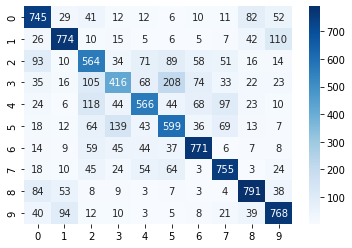

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

Accuracy and error curves intersect then diverge after 20 epochs.

This could mean that there is problems with overfitting.

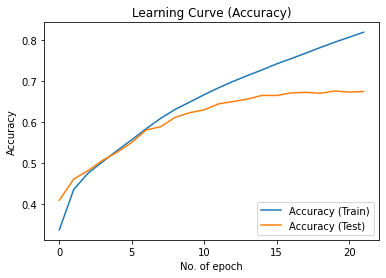

In [12]:
import matplotlib.pyplot as plt
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

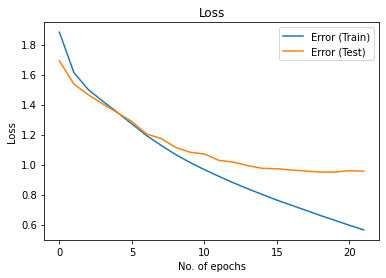

In [13]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='upper right')
plt.show()

# Model 2
### VGG Like Model
VGG is an image classification model.
A modified version with fewer pairs of Conv2D is used here.

A second dense layer was also added to the model compared to the previous model

Source: https://www.robots.ox.ac.uk/~vgg/research/very_deep/

In [14]:
#enumulate VGG, model 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
%%time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=100, batch_size=100, 
                    validation_data=(X_test, y_test), verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 5s - loss: 1.5121 - accuracy: 0.4501 - val_loss: 1.1247 - val_accuracy: 0.5945
Epoch 2/100
500/500 - 3s - loss: 1.0281 - accuracy: 0.6359 - val_loss: 0.9226 - val_accuracy: 0.6773
Epoch 3/100
500/500 - 3s - loss: 0.8094 - accuracy: 0.7174 - val_loss: 0.8353 - val_accuracy: 0.7101
Epoch 4/100
500/500 - 3s - loss: 0.6809 - accuracy: 0.7616 - val_loss: 0.7470 - val_accuracy: 0.7433
Epoch 5/100
500/500 - 3s - loss: 0.5836 - accuracy: 0.7971 - val_loss: 0.6903 - val_accuracy: 0.7679
Epoch 6/100
500/500 - 3s - loss: 0.4922 - accuracy: 0.8294 - val_loss: 0.6771 - val_accuracy: 0.7723
Epoch 7/100
500/500 - 3s - loss: 0.4228 - accuracy: 0.8515 - val_loss: 0.7003 - val_accuracy: 0.7702
Epoch 8/100
500/500 - 3s - loss: 0.3658 - accuracy: 0.8710 - val_loss: 0.7142 - val_accuracy: 0.7831
Epoch 9/100
500/500 - 3s - loss: 0.3137 - accuracy: 0.8884 - val_loss: 0.7508 - val_accuracy: 0.7674
CPU times: user 26.5 s, sys: 2.7 s, total: 29.2 s
Wall time: 29.6 s


In [16]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 23.26%


Error and precision is better. It can be said that the model has improved

              precision    recall  f1-score   support

    airplane       0.84      0.75      0.79      1000
  automobile       0.87      0.90      0.88      1000
        bird       0.65      0.71      0.68      1000
         cat       0.53      0.67      0.59      1000
        deer       0.81      0.62      0.70      1000
         dog       0.69      0.69      0.69      1000
        frog       0.82      0.83      0.83      1000
       horse       0.82      0.80      0.81      1000
        ship       0.89      0.86      0.87      1000
       truck       0.84      0.84      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



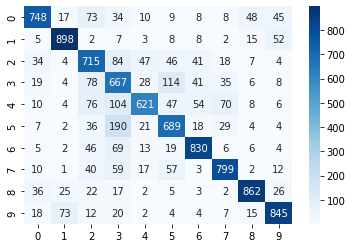

In [17]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

As the error curve for test set diverges further from the train set after subsequent epochs, this means that there is problems with overfitting 

Further improvements will need to be made to the fit

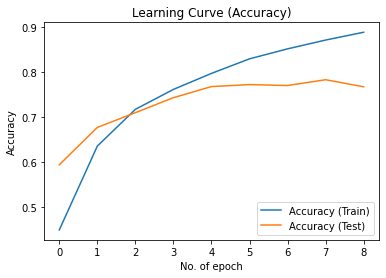

In [18]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

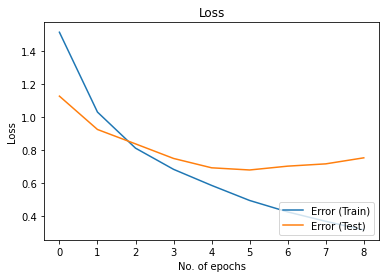

In [19]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 3
### Batch Normalized model

This model uses batchnormalization to further improve the model.

In [20]:
#model 3
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
%%time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_data=(X_test, y_test), verbose=2, callbacks=callback)

Epoch 1/100
625/625 - 6s - loss: 1.6017 - accuracy: 0.4386 - val_loss: 1.3092 - val_accuracy: 0.5382
Epoch 2/100
625/625 - 4s - loss: 1.1595 - accuracy: 0.5885 - val_loss: 1.1425 - val_accuracy: 0.5971
Epoch 3/100
625/625 - 5s - loss: 0.9812 - accuracy: 0.6537 - val_loss: 0.9916 - val_accuracy: 0.6541
Epoch 4/100
625/625 - 4s - loss: 0.8685 - accuracy: 0.6946 - val_loss: 0.9222 - val_accuracy: 0.6751
Epoch 5/100
625/625 - 4s - loss: 0.7847 - accuracy: 0.7254 - val_loss: 0.9154 - val_accuracy: 0.6750
Epoch 6/100
625/625 - 4s - loss: 0.7185 - accuracy: 0.7514 - val_loss: 0.8440 - val_accuracy: 0.7072
Epoch 7/100
625/625 - 4s - loss: 0.6551 - accuracy: 0.7726 - val_loss: 0.8614 - val_accuracy: 0.7001
Epoch 8/100
625/625 - 4s - loss: 0.6019 - accuracy: 0.7919 - val_loss: 0.8158 - val_accuracy: 0.7189
Epoch 9/100
625/625 - 4s - loss: 0.5512 - accuracy: 0.8099 - val_loss: 0.8398 - val_accuracy: 0.7129
Epoch 10/100
625/625 - 4s - loss: 0.5032 - accuracy: 0.8264 - val_loss: 0.7967 - val_accura

In [22]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 26.26%


Precision and error is better than previously, will need to check the learning curves to see if the model has problems with fit

              precision    recall  f1-score   support

    airplane       0.77      0.75      0.76      1000
  automobile       0.83      0.86      0.85      1000
        bird       0.63      0.64      0.64      1000
         cat       0.57      0.52      0.54      1000
        deer       0.70      0.68      0.69      1000
         dog       0.65      0.62      0.64      1000
        frog       0.81      0.81      0.81      1000
       horse       0.75      0.80      0.78      1000
        ship       0.81      0.86      0.84      1000
       truck       0.82      0.83      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.73      0.74      0.74     10000
weighted avg       0.73      0.74      0.74     10000



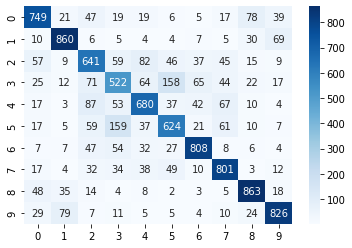

In [23]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

As the curves for the error do not diverge as rapidly as previously, the fit is probably better

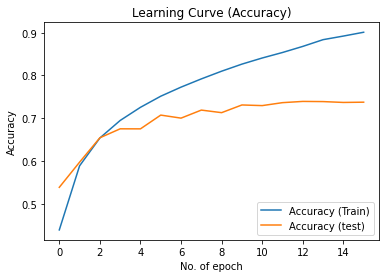

In [24]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

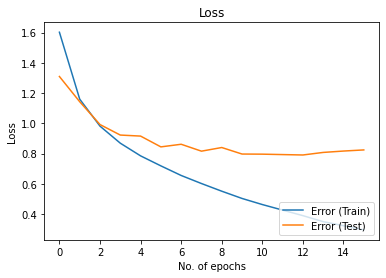

In [25]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 4

further dropout and batch normalization layers will be added for this model

In [26]:
#model 4, dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
%%time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_data=(X_test, y_test), verbose=2, callbacks=callback)

Epoch 1/100
625/625 - 6s - loss: 1.6791 - accuracy: 0.4134 - val_loss: 1.3421 - val_accuracy: 0.5119
Epoch 2/100
625/625 - 4s - loss: 1.3007 - accuracy: 0.5361 - val_loss: 1.1943 - val_accuracy: 0.5694
Epoch 3/100
625/625 - 4s - loss: 1.1598 - accuracy: 0.5858 - val_loss: 1.1458 - val_accuracy: 0.5961
Epoch 4/100
625/625 - 4s - loss: 1.0638 - accuracy: 0.6216 - val_loss: 1.2456 - val_accuracy: 0.5658
Epoch 5/100
625/625 - 5s - loss: 0.9926 - accuracy: 0.6474 - val_loss: 1.0393 - val_accuracy: 0.6389
Epoch 6/100
625/625 - 4s - loss: 0.9369 - accuracy: 0.6678 - val_loss: 0.9863 - val_accuracy: 0.6463
Epoch 7/100
625/625 - 4s - loss: 0.8911 - accuracy: 0.6852 - val_loss: 1.1032 - val_accuracy: 0.6127
Epoch 8/100
625/625 - 4s - loss: 0.8518 - accuracy: 0.6981 - val_loss: 0.9291 - val_accuracy: 0.6692
Epoch 9/100
625/625 - 4s - loss: 0.8163 - accuracy: 0.7107 - val_loss: 0.9138 - val_accuracy: 0.6802
Epoch 10/100
625/625 - 4s - loss: 0.7818 - accuracy: 0.7217 - val_loss: 0.8392 - val_accura

In [28]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 22.41%


Error has improved, so has the precision.
Model seems to have problems identifying cats the most

              precision    recall  f1-score   support

    airplane       0.86      0.68      0.76      1000
  automobile       0.92      0.85      0.88      1000
        bird       0.76      0.63      0.69      1000
         cat       0.59      0.63      0.61      1000
        deer       0.71      0.78      0.74      1000
         dog       0.65      0.72      0.68      1000
        frog       0.79      0.89      0.84      1000
       horse       0.86      0.79      0.82      1000
        ship       0.82      0.92      0.87      1000
       truck       0.86      0.87      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



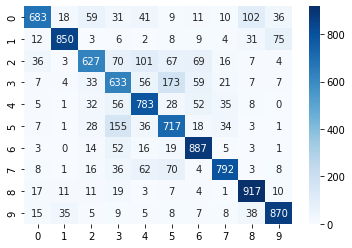

In [29]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

The curves for both test and train sets are similiar up until a point where they diverge like previous models
However, the divergence is after quite a number of epochs.
Model has probably improved

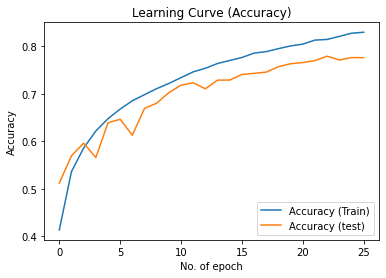

In [30]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

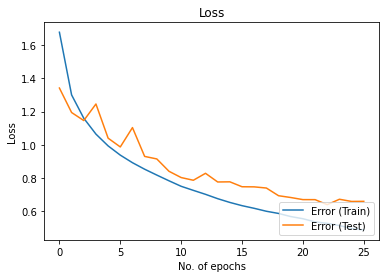

In [31]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 5
Model 5 will use an increasingly larger dropout rate

No callbacks will be used so that the model has more time to develop the best error

In [32]:
#model 5
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
%%time
history = model.fit(X_train, y_train, epochs=50, batch_size=80, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
625/625 - 6s - loss: 1.9052 - accuracy: 0.3386 - val_loss: 1.4930 - val_accuracy: 0.4474
Epoch 2/50
625/625 - 4s - loss: 1.4889 - accuracy: 0.4598 - val_loss: 1.3966 - val_accuracy: 0.4967
Epoch 3/50
625/625 - 5s - loss: 1.3378 - accuracy: 0.5168 - val_loss: 1.2880 - val_accuracy: 0.5299
Epoch 4/50
625/625 - 4s - loss: 1.2421 - accuracy: 0.5525 - val_loss: 1.1535 - val_accuracy: 0.5856
Epoch 5/50
625/625 - 4s - loss: 1.1738 - accuracy: 0.5794 - val_loss: 1.2392 - val_accuracy: 0.5617
Epoch 6/50
625/625 - 5s - loss: 1.1180 - accuracy: 0.5972 - val_loss: 1.0692 - val_accuracy: 0.6119
Epoch 7/50
625/625 - 4s - loss: 1.0794 - accuracy: 0.6126 - val_loss: 1.1614 - val_accuracy: 0.5882
Epoch 8/50
625/625 - 4s - loss: 1.0380 - accuracy: 0.6287 - val_loss: 1.0819 - val_accuracy: 0.6146
Epoch 9/50
625/625 - 4s - loss: 1.0058 - accuracy: 0.6413 - val_loss: 1.1505 - val_accuracy: 0.5933
Epoch 10/50
625/625 - 5s - loss: 0.9720 - accuracy: 0.6538 - val_loss: 0.9465 - val_accuracy: 0.6579

In [34]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 21.96%


Accuracy is better, precision and recall has also improved. 

              precision    recall  f1-score   support

    airplane       0.88      0.70      0.78      1000
  automobile       0.94      0.84      0.89      1000
        bird       0.80      0.59      0.68      1000
         cat       0.63      0.61      0.62      1000
        deer       0.69      0.80      0.74      1000
         dog       0.65      0.78      0.71      1000
        frog       0.71      0.93      0.81      1000
       horse       0.92      0.74      0.82      1000
        ship       0.86      0.89      0.87      1000
       truck       0.85      0.92      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



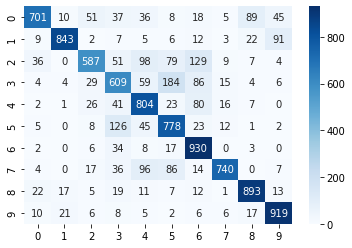

In [35]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

Test error curve does not diverge greatly from the train curve but insetead adheres to it quit well. 
This is the best model created here so far

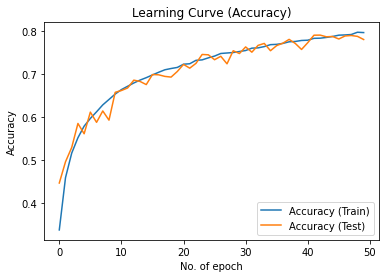

In [36]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

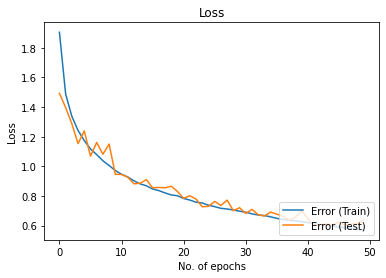

In [37]:
plt.plot(history.history['loss'], label='Error (Train)')
plt.plot(history.history['val_loss'], label='Error (Test)')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 6, augmentated train data with best model
For the final model, the best constructed model will predict using agumented data
The augmented data uses ImageDataGenerator

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=15)
train_data= datagen.flow(X_train, y_train, batch_size=100)

In [39]:
#model 5
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
%%time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(train_data, epochs=50, verbose=2, validation_data=(X_test,y_test))

Epoch 1/50
500/500 - 25s - loss: 0.8802 - accuracy: 0.6897 - val_loss: 1.0285 - val_accuracy: 0.6387
Epoch 2/50
500/500 - 24s - loss: 0.8677 - accuracy: 0.6931 - val_loss: 1.1429 - val_accuracy: 0.6217
Epoch 3/50
500/500 - 24s - loss: 0.8646 - accuracy: 0.6940 - val_loss: 1.0056 - val_accuracy: 0.6581
Epoch 4/50
500/500 - 25s - loss: 0.8526 - accuracy: 0.6958 - val_loss: 0.9195 - val_accuracy: 0.6765
Epoch 5/50
500/500 - 25s - loss: 0.8449 - accuracy: 0.6996 - val_loss: 0.9935 - val_accuracy: 0.6581
Epoch 6/50
500/500 - 24s - loss: 0.8484 - accuracy: 0.6994 - val_loss: 1.0196 - val_accuracy: 0.6509
Epoch 7/50
500/500 - 24s - loss: 0.8424 - accuracy: 0.7005 - val_loss: 0.9064 - val_accuracy: 0.6846
Epoch 8/50
500/500 - 24s - loss: 0.8378 - accuracy: 0.7009 - val_loss: 0.8784 - val_accuracy: 0.6951
Epoch 9/50
500/500 - 24s - loss: 0.8272 - accuracy: 0.7089 - val_loss: 0.9335 - val_accuracy: 0.6760
Epoch 10/50
500/500 - 25s - loss: 0.8201 - accuracy: 0.7109 - val_loss: 0.9039 - val_accura

In [46]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 23.07%


This model took a substancially longer time compared to previously, and the difference in error is not substancially better.
Precision is generally decent aside form frog class. Recall for some classes is bad, like cat, whith more values being predicted wrongly. 

Confusion matrix shows that cat has more than half false predictions

              precision    recall  f1-score   support

    airplane       0.78      0.80      0.79      1000
  automobile       0.92      0.88      0.89      1000
        bird       0.77      0.61      0.68      1000
         cat       0.71      0.45      0.55      1000
        deer       0.71      0.79      0.75      1000
         dog       0.84      0.53      0.65      1000
        frog       0.65      0.94      0.77      1000
       horse       0.82      0.84      0.83      1000
        ship       0.79      0.93      0.85      1000
       truck       0.78      0.93      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.76     10000



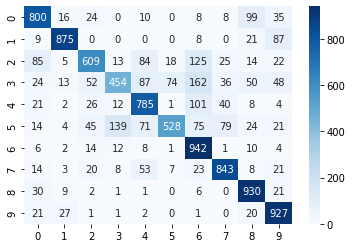

In [47]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

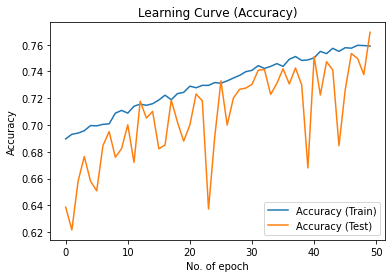

In [48]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Test)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

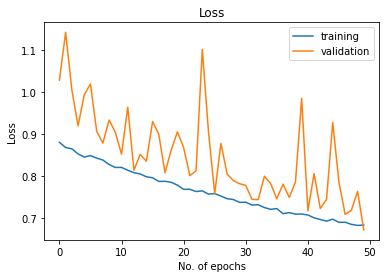

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='upper right')
plt.show()

# Conclusion

Model 5 has a good balance between error rate, precision, and recall. 
Thus, model 5 is considered to be the best model constructed here